# **Analyzing the DB provided in [software Product Ops-Exercise](https://docs.google.com/document/d/19UxTwAMdDQZG0pixRrIw-Erl77xL4fJpJ9MqaXBwudM/edit)**

Elaborated by: **Emmanuel Amador Maldonado**

Requested position: **Software Producr Ops Analyst**

**Jupyter notebooks are capable to read, extract, analyze and upload data to Data Base Management Systems (DBMS) using SQL code. I will use this type of file because is also capable to provide comments and python code, and graphics.**

### **Step 1: Creating the connection to the DB using SQLite**

I have already downloaded the .sqlite file.

Then I will import the python library sqlite3, where I can work and upload data to the DB, and other libraries to make filtering, cleaning, analysis and visualization of data.

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
con=sqlite3.connect(r"C:\Users\Emmanuel\Desktop\bright.sqlite")
cursor=con.cursor()

Once connected to the DB, I will load a jupyter complement that will allow me writing SQL code. This complement is loaded in the next code line:

In [7]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Then, I will connect to the DB with this extension

In [8]:
%sql sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite

Now we are ready to start the analysis and first approach to the DB tables.

### **PROBLEM 1** (Analysis and visualization of the DB)

*Instructions:
Visualize/analyze one of our conversion rates (listed above) in whatever way you see fit.
OR
Visualize/analyze our installation or interconnection speed in whatever way you see fit.
OR
Find something interesting to analyze that showcases your unique skills!*


As mention in the task, there are three tables.

- Lead
- Event
- Attribute

I will load this tables into Python, and look for missing data or data types that needs to be transform for the analysis.

In [9]:
lead=%sql SELECT * FROM lead; 
lead=lead.DataFrame()
lead.head(2)
# read all the table in sql code and save it in the lead variable
#then, convert sql table into a pandas (python) table

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


,lead_id,created_at
0,662958237495922433,2015-01-09T05:46:27Z
1,5936803624202314553,2015-01-10T22:49:25Z


In [10]:
event=%sql SELECT * FROM event;
event=event.DataFrame()
event.head(2)

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


,event_id,user_id,lead_id,created_at,event_type
0,662958237495922433,9086291099700738296,662958237495922433,2015-01-09T05:46:27Z,lead.created
1,5936803624202314553,9086291099700738296,5936803624202314553,2015-01-10T22:49:25Z,lead.created


In [11]:
attr=%sql SELECT * FROM attribute;
attr=attr.DataFrame()
attr.head(2)

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


,lead_id,name,value
0,4034644098856872731,ecUserId,6827679502985037031
1,2522396480838382595,ecUserId,4163434151428399388


In [12]:
lead.info() #give me the information of the table, such as 
#non-missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176229 entries, 0 to 176228
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   lead_id     176229 non-null  int64 
 1   created_at  176229 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


In [13]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337661 entries, 0 to 337660
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   lead_id  337661 non-null  int64 
 1   name     337661 non-null  object
 2   value    337661 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.7+ MB


In [14]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571286 entries, 0 to 1571285
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   event_id    1571286 non-null  int64 
 1   user_id     1571286 non-null  int64 
 2   lead_id     1571286 non-null  int64 
 3   created_at  1571286 non-null  object
 4   event_type  1571286 non-null  object
dtypes: int64(3), object(2)
memory usage: 59.9+ MB


All the table values are correct (It is not required to make a cleansing)

### **Approved conversion rate**

 #### **1.1- For all the leads uploaded, what percentage of them convert to becoming approved customers?**

While I was doing the queries in both, python and sql codes, I found something interesting. 

If we search for those data that in event_type column has ***Contract.approved***, we can find that the *percentage of approved customers* is **5 %**. 

Nevertheless, if we look for the exact description ***doc.subscriptionContract.approved**, we found that the percentage of approved customers is actually **2.3 %**

That is because there must be another parameter that has *Contract.approved* in their description. If we look for them, we can find that those descriptions are: 
        
        - doc.subscriptionContract.approved
        - doc.installationContract.approved
        - doc.interconnectionContract.approved  

So the first query will be wrong. Just 2.3 % of leads becomes approved customers.

**SQL CODE: using LIKE "%Contract.approved%" in the query**

In [15]:
%%sql
SELECT 100 * (SELECT COUNT(*) FROM event
WHERE event_type LIKE "%Contract.approved%")/COUNT(*) AS "Percentage leads approved" 
FROM lead;

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


Percentage leads approved
5


**SQL CODE: using the exact name "doc.subscriptionContract.approved" in the query**

In [16]:
%%sql
SELECT 100*(SELECT COUNT(*) FROM event
WHERE event_type = "doc.subscriptionContract.approved")/COUNT(*) AS "Percentage leads approved"
FROM lead

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


Percentage leads approved
2


**PYTHON CODE**

In [17]:
approved='doc.subscriptionContract.approved'
APP=100* len(event.query("event_type == @approved"))/len(lead)
print(f"The percentage of approved customers is {round(APP,2)} %")

The percentage of approved customers is 2.36 %


Getting the names of the events that has "Contract.approved"

**Using SQL:**

In [18]:
%%sql

SELECT DISTINCT event_type FROM event
WHERE event_type LIKE "%Contract.approved%" 

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


event_type
doc.subscriptionContract.approved
doc.interconnectionContract.approved
doc.installationContract.approved


##### **1.2 How installed leads has growth trough years.**

To do so, I need to first sum each lead with the same year of installation.

In [44]:
%%sql 
SELECT strftime("%Y", created_at), COUNT(*) FROM event

GROUP BY strftime("%Y", created_at);

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


"strftime(""%Y"", created_at)",COUNT(*)
2014,49
2015,3584
2016,27427
2017,118783
2018,191146
2019,340787
2020,434748
2021,454762


**Using SQL**:

In [19]:
%%sql

SELECT strftime("%Y", created_at) AS year, COUNT(strftime("%Y", created_at)) AS sum
FROM event
WHERE event_type ='doc.installationComplete.uploaded'
GROUP BY strftime("%Y", created_at);


 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


year,sum
2017,1261
2018,640
2019,645
2020,893
2021,1149


**Using Python:**

In [108]:
years={} #creates an empty dictionary
dates=event.query("event_type == 'doc.installationComplete.uploaded'").created_at.tolist()
# get a list of dates from the leads table
for date in dates:
    year=date.split("-")[0] #get the year of lead creation
    if year not in years: 
        years[year]=years.get(year,1) # add the year to the dictionary and set a value of 1
    else:
        years[year]=years.get(year)+1 # if year exist in the dictionary, then add 1 to the count

years#show how many installation system has been done each year

{'2017': 1261, '2018': 640, '2019': 645, '2020': 893, '2021': 1149}

Then, I need to find the growth rate of the installed systems. To do so, I will only use Python and the gradient (rate of growth, can be positive or negative)

First, I find the increase or decrease of installed systems each year, and then I divide that value by the net installed system each year to find the percentage of increase or decrease.

In [109]:
growth_rate=np.divide(100*np.gradient(list(years.values())),np.array(list(map(float,years.values())))) # how much installed growth does the company has each year
growth_rate

array([-49.24662966, -48.125     ,  19.6124031 ,  28.21948488,
        22.28024369])

I will plot the results of the Annual total installed systems and growth rate

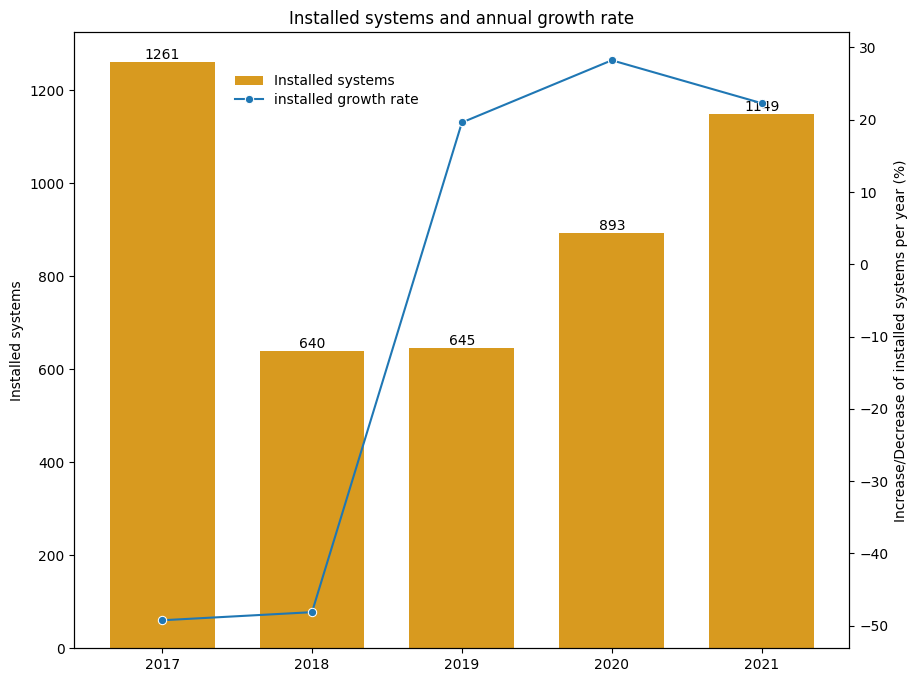

The median growth value of installed systems from 2017 to 2021 each year was 20 % , meanwhile the maximum growth was of 28.21948488241881 systems/year during 2021


In [110]:
fig,ax1 = plt.subplots(figsize=(10,8))

p1=sns.barplot(x=list(years.keys()),
            y=list(years.values()),
            color="#F7A400", # orange color in hexadecimal
            width=0.7,
            ax=ax1,
            label="Installed systems"
            )
p1.set_title("Installed systems and annual growth rate")
p1.legend(loc=(0.2,0.9),frameon=False)
p1.set_ylabel("Installed systems")

for i in p1.containers:
    p1.bar_label(i,)
    
ax2=ax1.twinx()
p2=sns.lineplot(data=growth_rate, 
             marker="o",
             label="installed growth rate",
             ax=ax2
             )
p2.set_ylabel("Increase/Decrease of installed systems per year (%)")
p2.legend(loc=(0.2,0.87), frameon=False)


plt.show()

print(f"The median growth value of installed systems from 2017 to 2021 each year was {round(np.median(growth_rate))} % , meanwhile the maximum growth was of {growth_rate.max()} systems/year during 2021")

##### **1.3. What percentage of all installed systems were interconnected?**

First, I need to find from installed system's lead_id, those lead_ids which has a report of interconnection

**Using SQL:**

In [23]:
%%sql
SELECT 100 * (SELECT COUNT(*) FROM event
        WHERE event_type = 'doc.interconnection.approved')/COUNT(*) AS "rate of interconnection" 
FROM event 
WHERE event_type = 'doc.installationComplete.uploaded';

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


rate of interconnection
81


**Using Python:**

First I retrieve those lead_id with complete installation and those with complete interconnection.

In [24]:
installed=event.query("event_type == 'doc.installationComplete.uploaded'").lead_id
interconnected=event.query("event_type == 'doc.interconnection.approved'").lead_id

Then, I just divide the lenght of both installed and interconnected list. To make it more visible, i will print a little sentence.

In [25]:
print(f"There are {len(installed)} leads that has installed systems and {len(interconnected)} with "+
      f"interconnected systems, \nwhich means the rate of interconnection is {round(100*len(interconnected)/len(installed),2)} %")

There are 4588 leads that has installed systems and 3743 with interconnected systems, 
which means the rate of interconnection is 81.58 %


**Using SQL to retrieve the number of installed systems**:

In [26]:
%%sql
SELECT COUNT(*) AS Installed_systems FROM event
WHERE event_type="doc.installationComplete.uploaded"

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


Installed_systems
4588


**Pie chart of Installed systems**

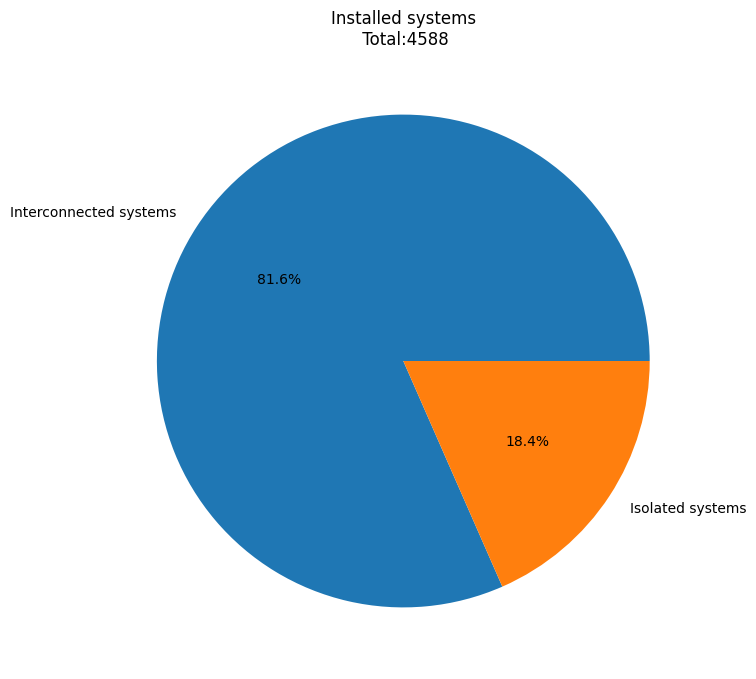

In [27]:
plt.figure(figsize=(10,8))
fig=plt.pie(x=[len(interconnected),len(installed)-len(interconnected)],
            labels=["Interconnected systems", "Isolated systems"],
            autopct="%1.1f%%"
        )
plt.title(f"Installed systems\n Total:{round(len(installed),2)}")
plt.show()

In [111]:
print(f"Isolated systems: {len(installed)-len(interconnected)}")

Isolated systems: 845


##### **1.4. How many installed systems were made to different leads?**

**Using SQL:**

In [28]:
%%sql
SELECT COUNT(*) AS "Different leads with different systems" FROM lead
WHERE lead_id IN (SELECT lead_id FROM event
                  WHERE event_type = "doc.installationComplete.uploaded");

 * sqlite:///C:\Users\Emmanuel\Desktop\bright.sqlite
Done.


Different leads with different systems
3563


**Using Python:**

In [118]:
diff_leads=len(pd.unique(installed))
print(f"Data indicates that just {round(100*(1-diff_leads/len(installed)),2)} % of the leads ask for the installation of more than one solar installation")

Data indicates that just 22.34 % of the leads ask for the installation of more than one solar installation
